In [1]:

import healpy as hp
%matplotlib inline
import numpy as np

from rubin_sim.scheduler.example import example_scheduler
from rubin_sim.scheduler import sim_runner
from rubin_sim.scheduler.model_observatory import  ModelObservatory
from rubin_sim.scheduler.utils import restore_scheduler

In [2]:
es = example_scheduler()
mo = ModelObservatory()

Optimizing ELAISS1
Optimizing XMM_LSS
Optimizing ECDFS
Optimizing COSMOS
Optimizing EDFS_a


In [3]:
# run it for a week
#mo, es, observations = sim_runner(mo, es,survey_length=465, verbose=True)

In [4]:
#np.savez('obs.npz', observations=observations)

In [5]:
data = np.load('obs.npz')
observations = data['observations'].copy()
data.close()

In [6]:
scheduler, observatory = restore_scheduler(282109, es, mo, observations, fast=True)

In [7]:
conditions = observatory.return_conditions()

In [8]:
rot = (conditions.lmst/24*360, conditions.site.latitude)

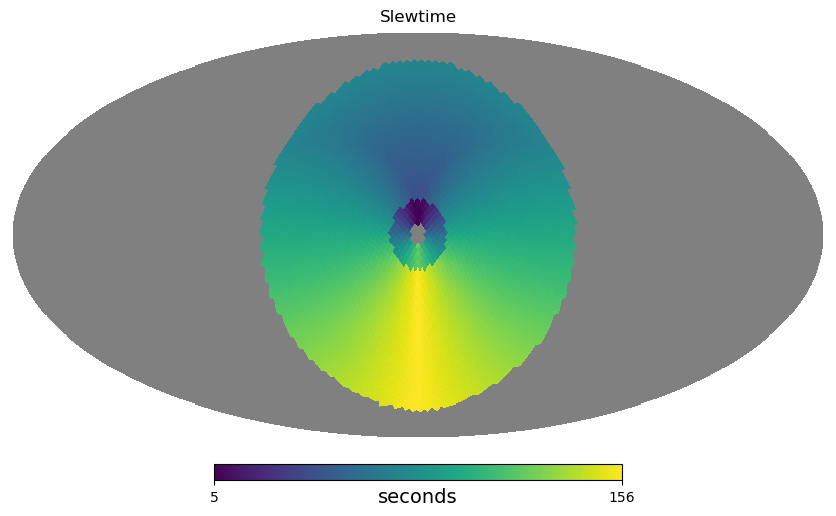

In [9]:
hp.mollview(conditions.slewtime, unit='seconds', title='Slewtime', min=5, max=156, rot=rot)

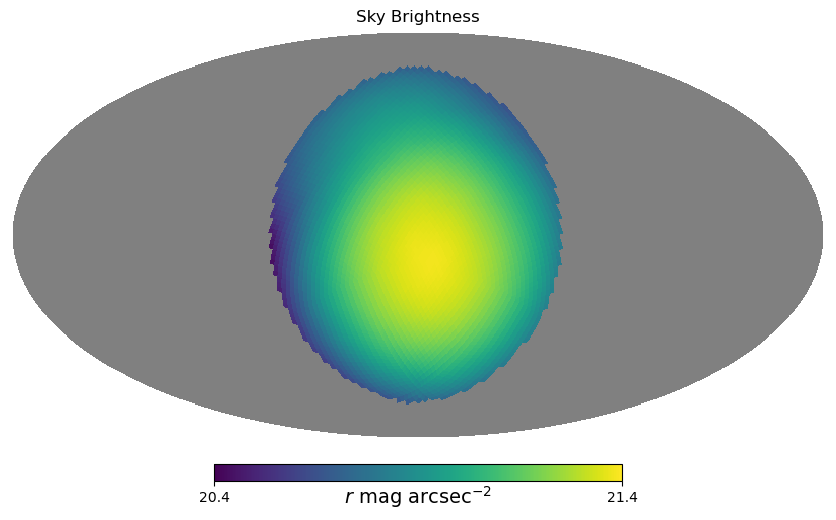

In [10]:
hp.mollview(conditions.skybrightness['r'], unit='$r$ mag arcsec$^{-2}$', title='Sky Brightness',
           min=20.4, max=21.4, rot=rot)

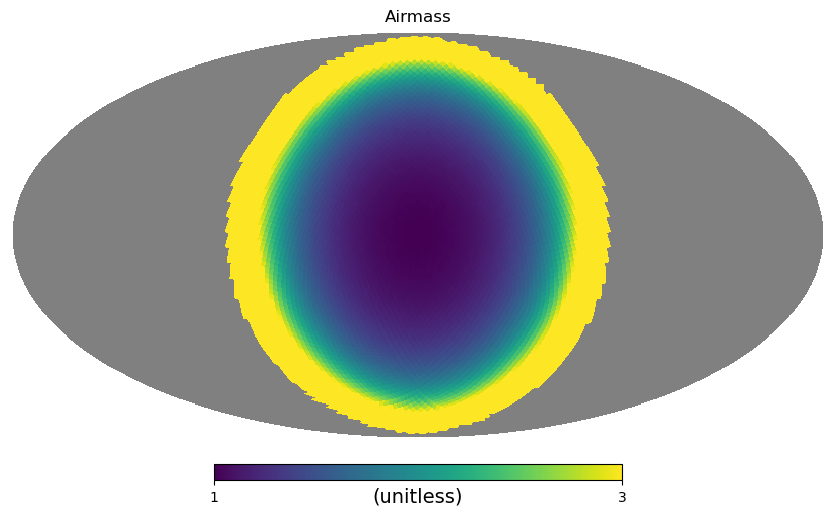

In [11]:
hp.mollview(conditions.airmass, unit='(unitless)', title='Airmass', max=3, min=1, rot=rot)


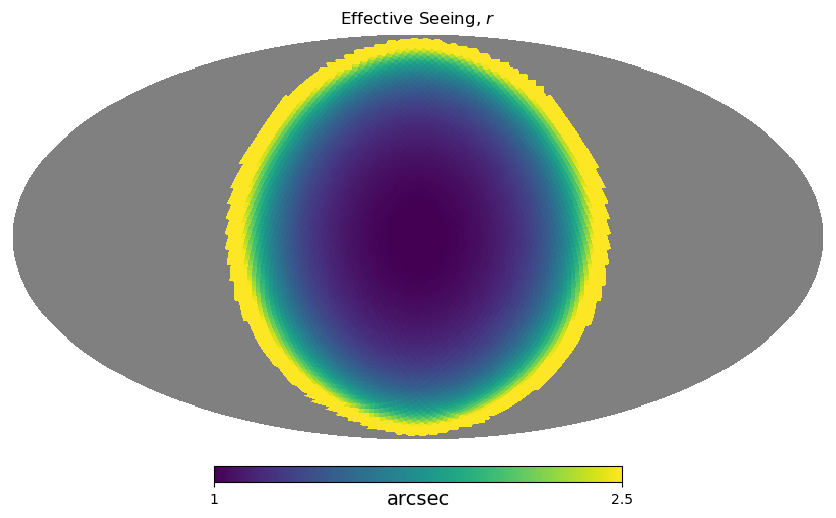

In [12]:
hp.mollview(conditions.fwhm_eff['r'], unit='arcsec', title='Effective Seeing, $r$', min=1., max=2.5, rot=rot)

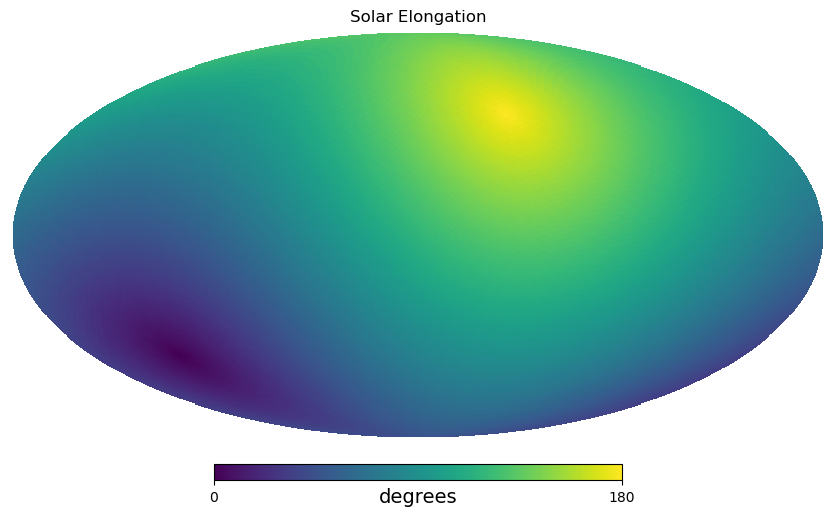

In [13]:
hp.mollview(np.degrees(conditions.solar_elongation), unit='degrees', title='Solar Elongation', max=180, min=0, rot=rot)

/Users/yoachim/git_repos/rubin_sim/rubin_sim/scheduler/utils/utils.py:70: RuntimeWarning: invalid value encountered in cast
  self.value = np.round(inval * scale).astype(int)


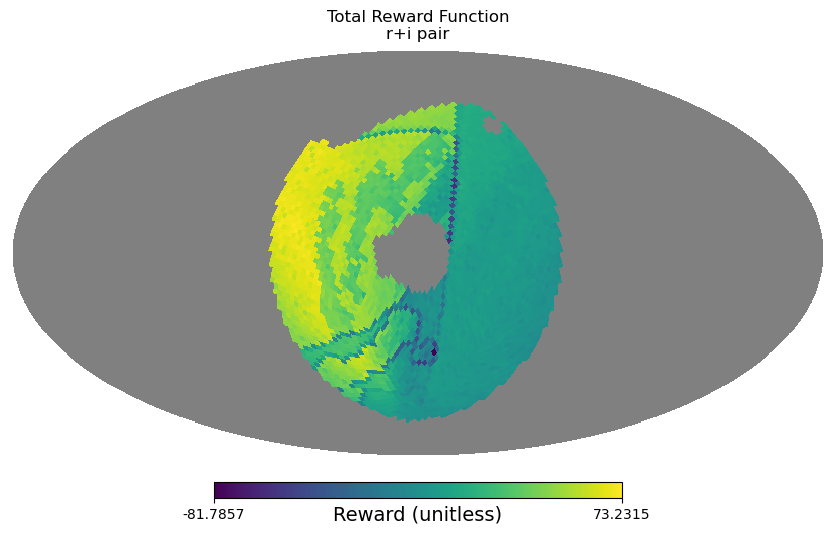

In [14]:
hp.mollview(scheduler.survey_lists[2][3].calc_reward_function(conditions),
            rot=rot,
           unit='Reward (unitless)', title='Total Reward Function\nr+i pair')

In [15]:
scheduler.survey_lists[2][3].basis_functions

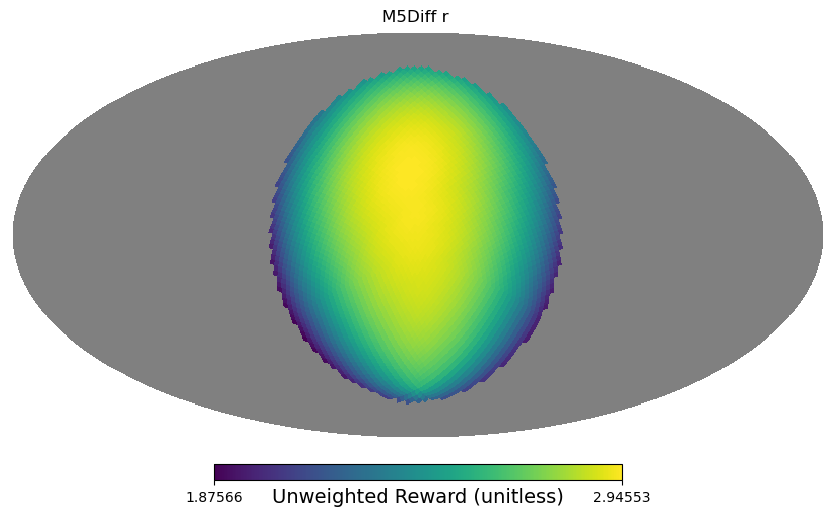

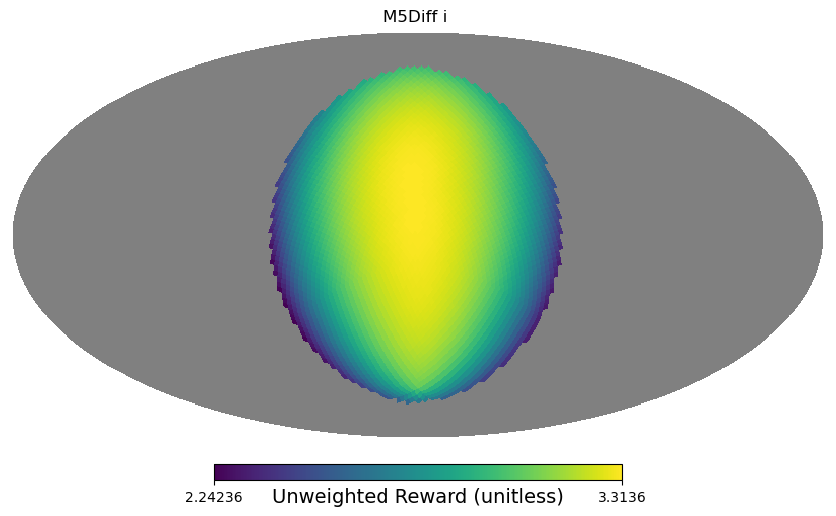

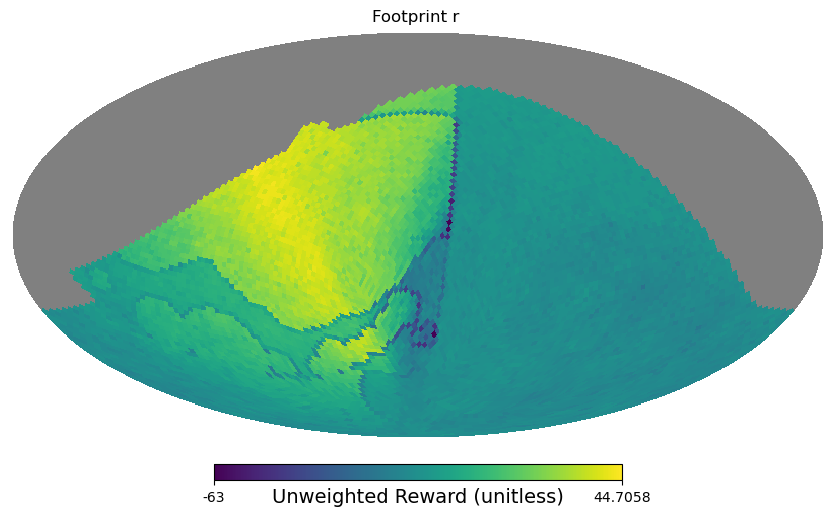

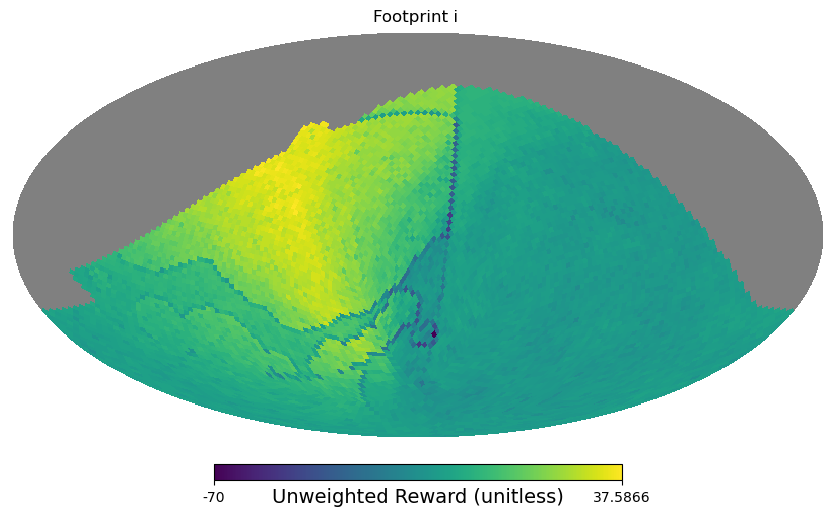

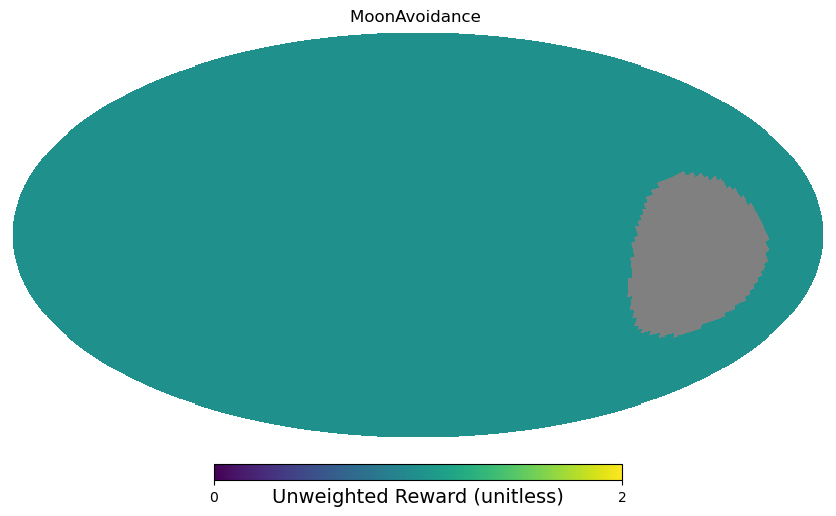

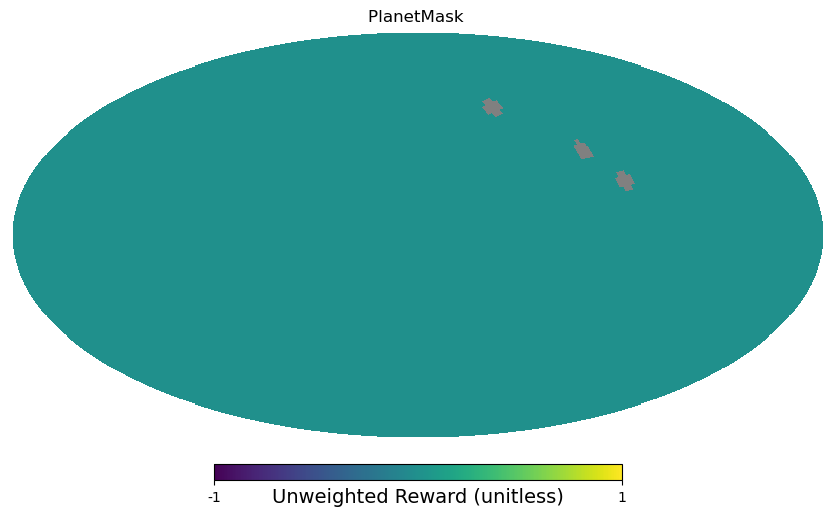

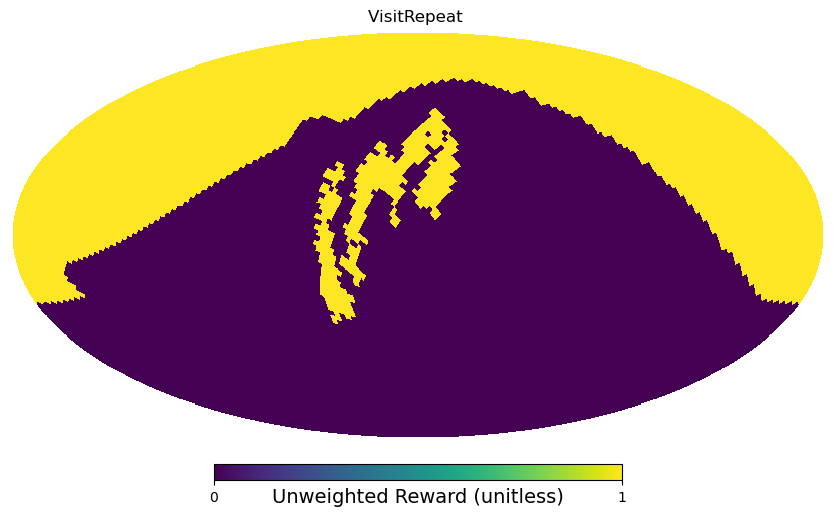

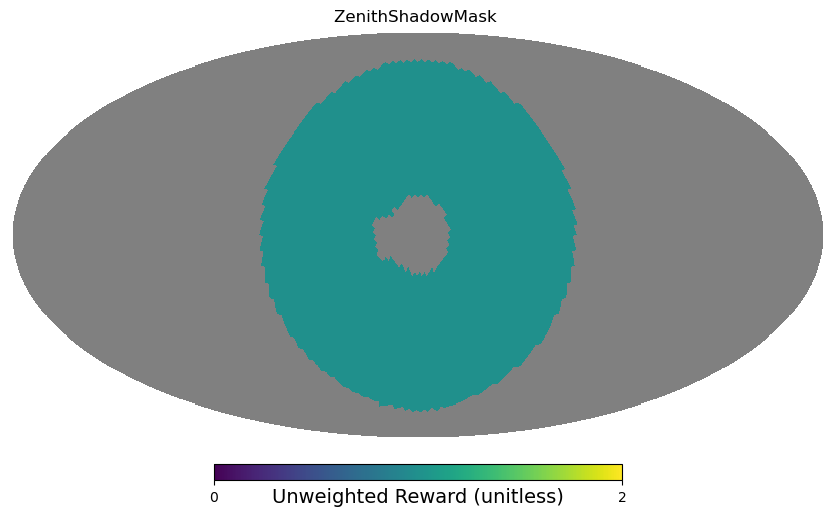

In [16]:
for bf in scheduler.survey_lists[2][3].basis_functions:
    result = bf(conditions)
    if np.size(result) > 1:
        title = title=bf.label().split('@')[0]
        hp.mollview(result, rot=(conditions.lmst/24*360, conditions.site.latitude), title=title,
                   unit='Unweighted Reward (unitless)')

In [17]:
scheduler.survey_lists[2][3].basis_functions

In [18]:
scheduler.survey_lists[2][3].basis_functions[13].label()

'NGoodSeeing i @5548449680'

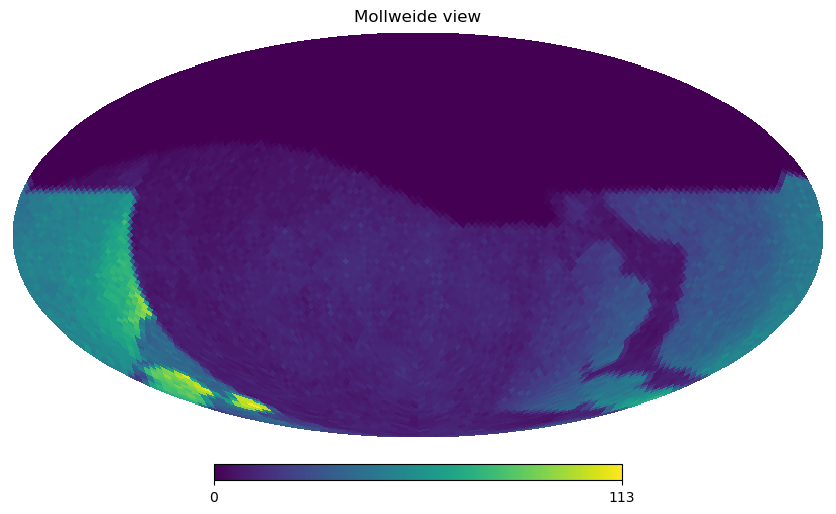

In [19]:
hp.mollview(scheduler.survey_lists[2][3].basis_functions[2].survey_features['N_obs']())

In [20]:
scheduler.survey_lists[2][3].ignore_obs

['DD', 'twilight_near_sun']

In [21]:
observations['note']

array(['greedy', 'greedy', 'greedy', ..., 'twilight_near_sun, 2',
       'twilight_near_sun, 2', 'twilight_near_sun, 2'], dtype='<U40')

In [22]:
conditions.current_filter

'i'